## 4.3 수치 미분
기울기 값을 기준으로 나아갈 방향을 정함

*미분

-미분은 특정순간의 변화량을 표시 한 것임

-시간을 가능한 한 줄여 한 순간의 변화량을 얻는 것

In [5]:
# 나쁜 구현의 예
def numerical_diff(f, x):
  h=1e-50 #반올림 오차가 생김
  return (f(x-h)-f(x))/h
#h로 10의-4승정도의 값을 사용하면 좋은 결과를 얻는다고 알려짐
# (x+h)와 (x-h)일 때의 함수 f의 차분을 계산하는 방법을 쓰기도 한다 이때 이 차분을 중심차분 또는 중앙차분이라고 한다

In [16]:
def numerical_diff(f,x):
  h=1e-4
  return (f(x+h)-f(x-h))/(2*h)

In [6]:
#수치 미분의 예
def function_1(x):
  return 0.01*x**2+0.1*x

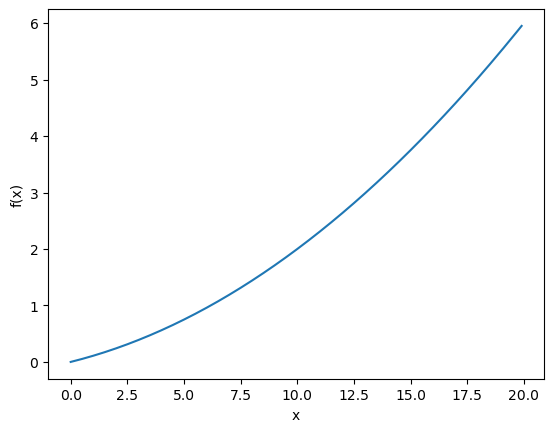

0.1999999999990898
0.2999999999986347


In [17]:
import numpy as np
import matplotlib.pylab as plt
x=np.arange(0.0,20.0,0.1)
y=function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()
print(numerical_diff(function_1,5)) 
print(numerical_diff(function_1, 10))

In [18]:
#편미분
def function_2(x):
  return x[0]**2+x[1]**2
  #또는 return np.sum(x**2)
#변수가 2개임 따라서 어느 변수에 대한 미분이냐를 구별해야 함
#이런 변수가 여렷인 함수에 대한 미분을 편미분이라고 힘

In [19]:
def function_tmp1(x0):
  return x0*x0+4.0**2.0
numerical_diff(function_tmp1,3.0)

6.00000000000378

In [20]:
def function_tmp2(x1):
  return 3.0**2.0+x1*x1 # 변수 고정(3.0**2.0)
numerical_diff(function_tmp2,4.0)

7.999999999999119

In [21]:
#변수 고정을 위해 새로운 함수를 정의

## 4.4 기울기
모든 변수의 편미분을 벡터로 정리한 것을 기울기라고 함

In [22]:
def numerical_gradient(f,x): #넘파이 배열의 각 원소에 대해 수치 미분을 구함
  h=1e-4 #0.0001
  grad=np.zeros_like(x) # x와 형상이 같은 배열을 생성
  for idx in range(x.size):
    tmp_val=x[idx]

    # f(x+h) 계산
    x[idx]=tmp_val+h
    fxh1=f(x)

    #f(x-h) 계산
    x[idx]=tmp_val-h
    fxh2=f(x)

    grad[idx]=(fxh1-fxh2)/(2*h)
    x[idx]=tmp_val # 값복원
  return grad

In [25]:
numerical_gradient(function_2, np.array([3.0,4.0]))

array([6., 8.])

In [26]:
numerical_gradient(function_2, np.array([0.0,2.0]))

array([0., 4.])

In [27]:
numerical_gradient(function_2, np.array([3.0,0.0]))

array([6., 0.])

-기울기 그림은 방향을 가진 벡터로 그려짐

-화살표는 한 방향을 향함

-기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장크게 줄이는 방향임

경사법

-기울기를 이용해 함수의 최솟값을 찾으려는 것

-각 지점에서 함수의 값을 낮추는 방향을 제시하는 지표가 기울기하는 것을 주의해야 함

-극소,최솟값, 안장점이되는 장소에선 기울기가 0임

-복잡하고 찌그러진 모양의 함수라면 평평한 곳으로 파고들면서 고원(플래토)이라고 하는 학습이 진행되지 않는 정체기에 빠질 수 있음

-경사법:현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다 그 뒤 이동한 곳에서도 기울기를 구하고 기울어진 방향으로 나아가기를 반복해 함수의 값을 줄이는 방법 

-최솟값을 찾으면 경사 하강법 최댓값을 찾으면 경사 상승법

-기호 에타는 갱신하는 양을 나타내고 학습률이라고 함

-학습률 값은 0.01이나 0.001같이 특정 값으로 미리 정해야 함, 이 값이 너무 크거나 작으면 좋은 장소를 찾아갈 수 없음 

In [28]:
def gradient_descent(f,init_x, lr=0.01, step_num=100):
# f = 최적화하려는 함수 
# init_x = 초깃값
# lr = 학습률
# step_num = 경사법의 반복횟수
  x=init_x

  for i in range(step_num):
    grad=numerical_gradient(f,x) #함수의 기울기를 구함
    x-=lr*grad
  return x

In [29]:
def function_2(x):
  return x[0]**2+x[1]**2
init_x=np.array([-3.0, 4.0]) # 초기값
gradient_descent(function_2, init_x=init_x, lr=0.1,step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [31]:
# 학습률 너무 클때: 발산함
init_x=np.array([-3.0, 4.0]) 
gradient_descent(function_2, init_x=init_x, lr=10.0,step_num=100) 

array([-2.58983747e+13, -1.29524862e+12])

In [32]:
# 학습률 너무 작을때:거의 갱신되지 않음
init_x=np.array([-3.0, 4.0]) 
gradient_descent(function_2, init_x=init_x, lr=1e-10,step_num=100)

array([-2.99999994,  3.99999992])

신경망에서의 기울기

-여기서말하는 기울기는 가중치 매개변수에 대한 손실 함수의 기울기임

In [34]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from commen.gradient import numerical_gradient
class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3) # 정규분포로 초기화
  def predict(self,x): # 예측을 수행함
    return np.dot(x, self.W)
  def loss(self,x,t): # 손실함수의 값 구함(x는 입력데이터, t는 정답레이블)
    z = self.predict(x) 
    y = softmax(z)
    loss = cross_entropy_error(y,t)

    return loss

ModuleNotFoundError: No module named 'common'

In [38]:
net= simpleNet()
print(net.W)
x=np.array([0.6,0.9])
p=net.predict(x)
print(p)
np.argmax(p)
t=np.array([0,0,1])
net.loss(x,t)

NameError: name 'simpleNet' is not defined

In [39]:
def f(W): # net.W을 인수로 받아 손실함수 계산함
  return net.loss(x,t)
dw=numerical_gradient(f,net.W) 
print(dw)

NameError: name 'net' is not defined

In [41]:
f = lamda w: net.loss(x,t)
dw = numerical_gradient(f,net.W)

SyntaxError: invalid syntax (826340862.py, line 1)

## 4.5 학습 알고리즘 구현하기
*신경망 학습의 절차

-전제
    
    신경망에는 적응 가능한 가중치와 편향이 있고, 이가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 "학습"이라 함

1.미니배치
    
    훈련 데이터 중 일부를 무작위로 가져옴. 이렇게 선별한 데이터를 미니배치라 하며, 미니배치의 손실함수 값을 줄이는 것이 목표임.

2,기울기 산출
    
    미니배치의 손실 함수 값을 줄이기 위해 각 가중치 배개변수의 기울기를 구함. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시

3.매개변수 갱신

    가중치 매개변수를 기울기 방향으로 아주 조금 갱신함
    
4.반복

    1~3단계를 반복함

이를 확률적 경사 하강법이라고 부르며 확률적으로 무작위로 골라낸 데이터에 대해 수행하는 경사 하강법이라는 의미임, 대부분의 딥러닝 프레임워크는 sgd하는 함수로 이 기능을 구현 함 

In [50]:
#2층 신경망 클래스 구현하기
import sys, os
sys.path.append(os.pardir)
from common.functions import 
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        #가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std \  np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std \ np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
     
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y==t)/float(x.shape[0])
        return accuracy
    def numerical_gredient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads = ['W1'] = numerical_gredient(loss_W, self.params['W1'])
        grads = ['b1'] = numerical_gredient(loss_W, self.params['b1'])
        grads = ['W2'] = numerical_gredient(loss_W, self.params['W2'])
        grads = ['b2'] = numerical_gredient(loss_W, self.params['b2'])
        
        return grads

SyntaxError: invalid syntax (551284098.py, line 4)

In [51]:
x = np.random.rand(100, 784)#더미 입력 데이터(100장 분량)
y = net.predict(x)

NameError: name 'net' is not defined

In [52]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)#기울기 계산

grads['W1'].shape#(784, 100)
grads['b1'].shape#(100,)
grads['W2'].shape#(100, 10)
grads['b1'].shape#(10,)

NameError: name 'net' is not defined

In [54]:
#미니배치 학습 구현하기
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
  load_mnist(normalize = True, one_hot_label =True)

train_loss_list = []

#하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size = 50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

  # 기울기 계산
  #grad = network.numerical_gradient(x_batch, t_batch) # 성능 열화판
    grad = network.gradient(x_batch, t_batch) # 성능 개선판

  # 매개변수 갱신 
    for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

ModuleNotFoundError: No module named 'dataset'

In [56]:
#시험 데이터로 평가하기
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
  load_mnist(normalize = True, one_hot_label =True)

train_loss_list = []

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

#하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_loss_list = []

#1에폭당 반복수(1에폭=학습에서 훈련데이터를 모두 소진했을때의 횟수)
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch) # 성능 열화판
    #grad = network.gradient(x_batch, t_batch) # 성능 개선판
    # 매개변수 갱신 
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    #1에폭당 정확도 계산
    if i%iter_per_epoch==0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.appnd(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc |"
              + str(train_acc)+","+str(test_acc))


ModuleNotFoundError: No module named 'dataset'